# Анализ временного ряда цен на акции

В этом ноутбуке мы будем анализировать временной ряд цен на акции с использованием библиотеки `yfinance`. Мы также будем использовать нашу собственную библиотеку для обработки данных.

## Импорт библиотек

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from time_series_analysis.time_series import TimeSeries  # Наша библиотека

## Загрузка данных

In [2]:
# Загрузка данных цен на акции Apple (AAPL)
ticker = "AAPL"
start_date = "2023-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


## Визуализация данных
Посмотрим на график цен закрытия акций

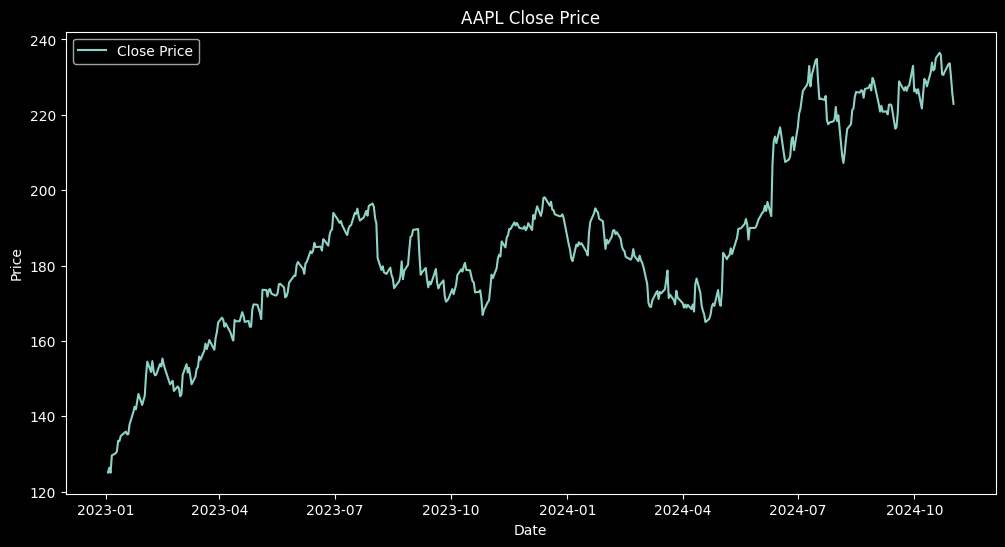

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Close Price")
plt.title(f"{ticker} Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Сглаживание данных
Используем нашу библиотеку для сглаживания данных

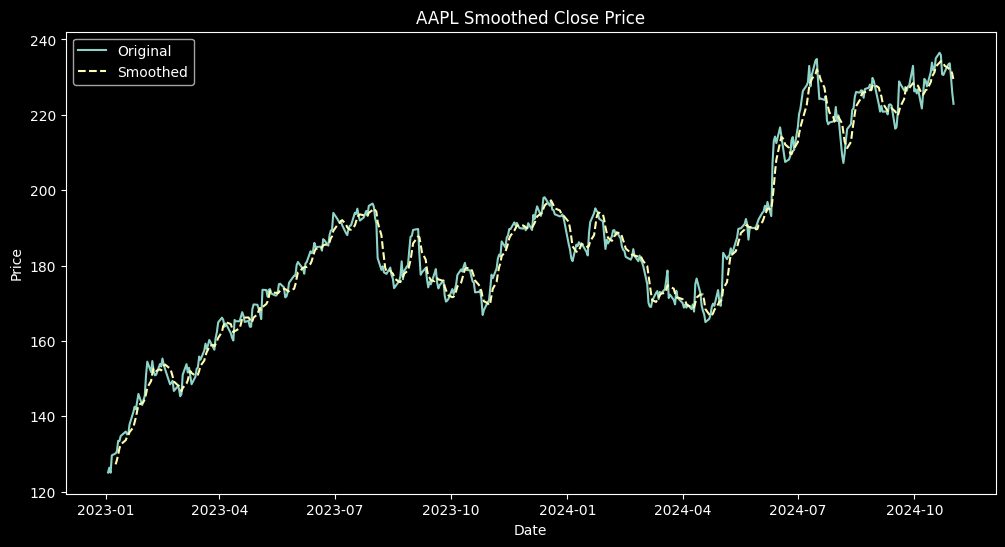

In [4]:
# Создаем объект TimeSeries
time_series = TimeSeries(data["Close"])

window_size = 5

# Сглаживание данных с использованием скользящего среднего
smoothed_data = list(time_series.smoothed(window_size=window_size))

# Визуализация сглаженных данных
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Original")
plt.plot(
    data.index[window_size - 1:], smoothed_data, label="Smoothed", linestyle="--"
)
plt.title(f"{ticker} Smoothed Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Дифференцирование данных
Используем нашу библиотеку для дифференцирования данных

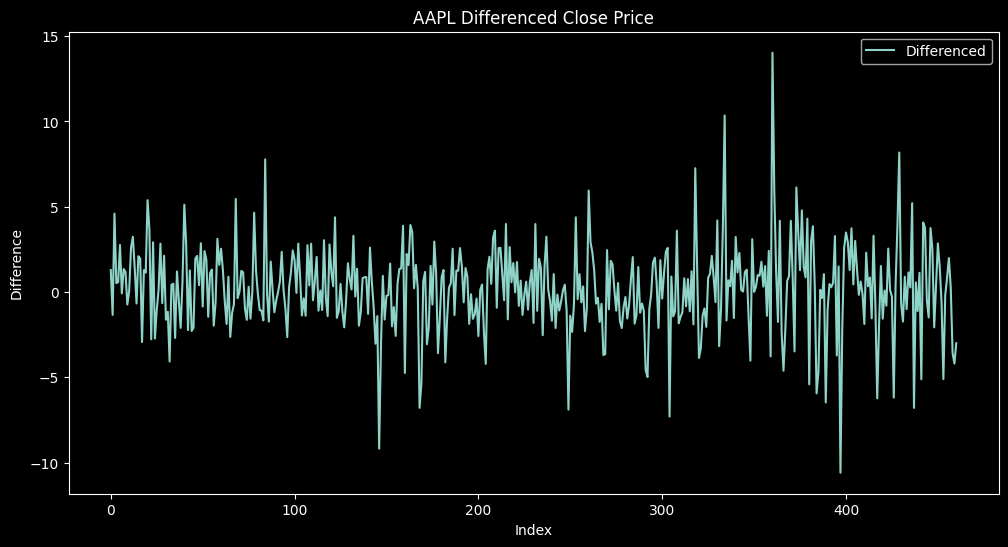

In [5]:
# Дифференцирование данных
differenced_data = list(time_series.difference())

# Визуализация дифференцированных данных
plt.figure(figsize=(12, 6))
plt.plot(differenced_data, label="Differenced")
plt.title(f"{ticker} Differenced Close Price")
plt.xlabel("Index")
plt.ylabel("Difference")
plt.legend()
plt.show()

## Автокорреляция
Вычислим автокорреляцию временного ряда

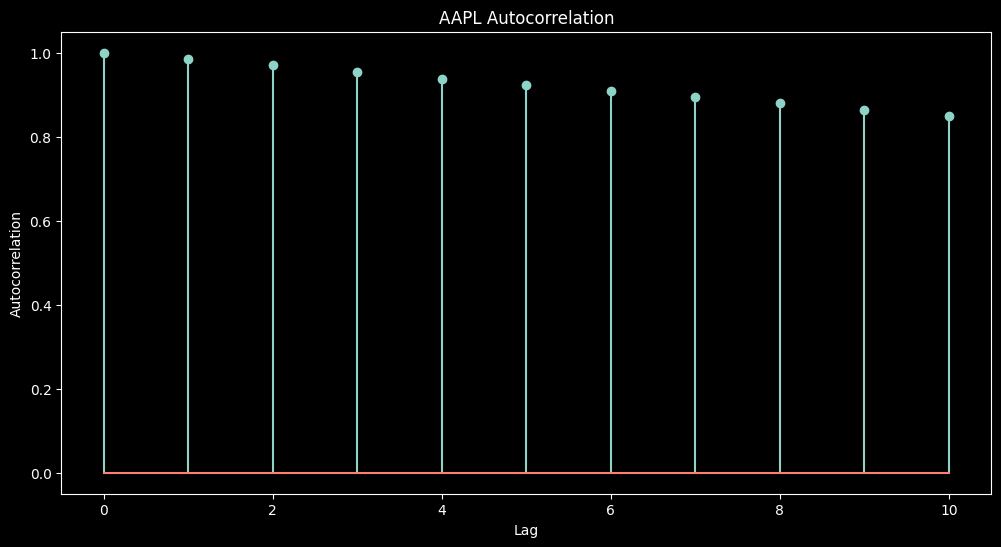

In [6]:
# Автокорреляция данных
autocorrelation_data = list(time_series.autocorrelation(lag=10))

# Визуализация автокорреляции
plt.figure(figsize=(12, 6))
plt.stem(autocorrelation_data)
plt.title(f"{ticker} Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

## Нахождение экстремумов
Найдем локальные максимумы и минимумы в данных

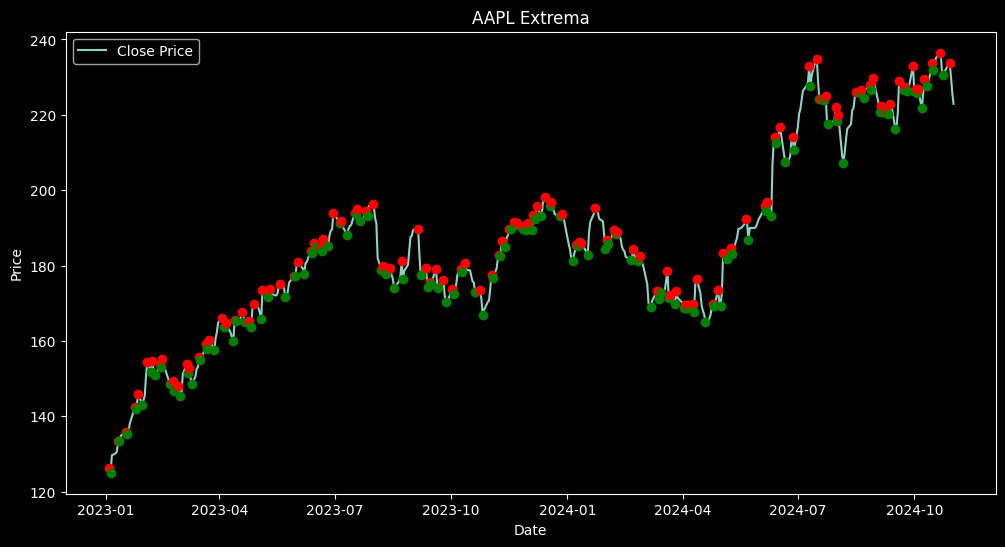

In [7]:
# Нахождение экстремумов
extrema = list(time_series.find_extrema())

# Визуализация экстремумов
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Close Price")
for index, value, ext_type in extrema:
    if ext_type == "max":
        plt.plot(data.index[index], value, "ro")
    elif ext_type == "min":
        plt.plot(data.index[index], value, "go")
plt.title(f"{ticker} Extrema")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Прогнозирование
Используем модель ARIMA для прогнозирования будущих значений

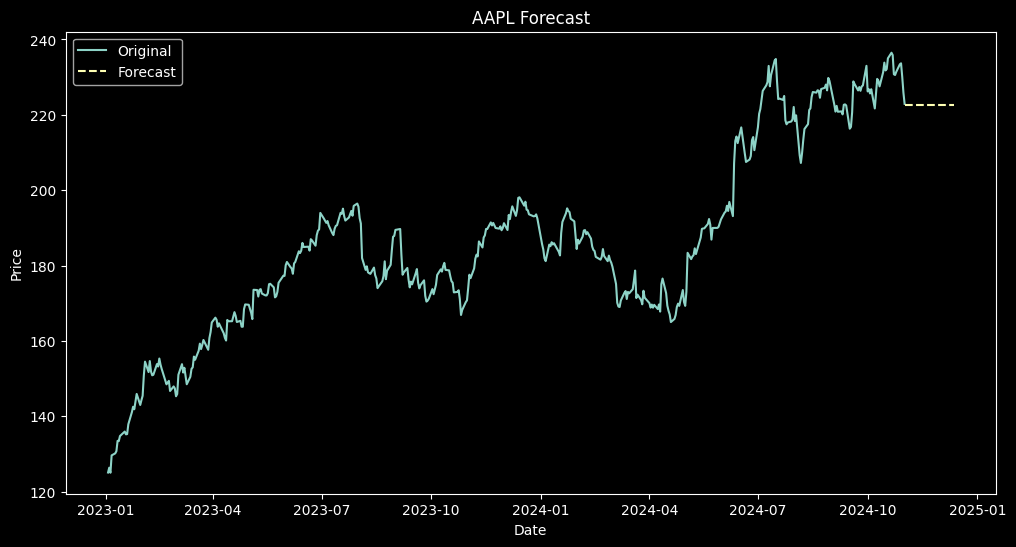

In [8]:
# Прогнозирование данных
forecast_data = list(time_series.forecast(steps=30))

# Визуализация прогнозированных данных
plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Original")
plt.plot(
    pd.Series(
        forecast_data, index=pd.date_range(start=data.index[-1], periods=30, freq="B")
    ),
    label="Forecast",
    linestyle="--",
)
plt.title(f"{ticker} Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Заключение
В этом ноутбуке мы провели анализ временного ряда цен на акции, используя различные методы обработки данных из нашей библиотеки. Мы сгладили данные, дифференцировали их, вычислили автокорреляцию, нашли экстремумы и прогнозировали будущие значения.